In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

pd.options.display.max_columns = None

---

In [2]:
data = pd.read_csv('../train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#data['TotalBsmtSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] +data['BsmtUnfSF'] - data['TotalBsmtSF']
data = data.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1)

#data['GrLivArea'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['LowQualFinSF']
data = data.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis = 1)

# Street: Type of road access to property
#    Grvl Gravel  
#    Pave Paved
data['Street'] = data['Street'].map({'Grvl': 0, 'Pave': 1})

# Alley: Type of alley access to property
#    Grvl Gravel
#    Pave Paved
#    NA   No alley access
data['Alley'] = data['Alley'].map({'NA': 0, 'Grvl': 1, 'Pave': 2})
data['Alley'] = data['Alley'].fillna(0)

# LotShape: General shape of property
#    Reg  Regular 
#    IR1  Slightly irregular
#    IR2  Moderately Irregular
#    IR3  Irregular
data['LotShape'] = data['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})

# LandContour: Flatness of the property
#    Lvl  Near Flat/Level 
#    Bnk  Banked - Quick and significant rise from street grade to building
#    HLS  Hillside - Significant slope from side to side
#    Low  Depression
data['LandContour'] = data['LandContour'].map({'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1})

# Utilities: Type of utilities available
#    AllPub   All public Utilities (E,G,W,& S)    
#    NoSewr   Electricity, Gas, and Water (Septic Tank)
#    NoSeWa   Electricity and Gas Only
#    ELO  Electricity only    
data['Utilities'] = data['Utilities'].map({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1})

# LandSlope: Slope of property
#    Gtl  Gentle slope
#    Mod  Moderate Slope  
#    Sev  Severe Slope
data['LandSlope'] = data['LandSlope'].map({'Sev': 3, 'Mod': 2, 'Gtl': 1})

data['Condition1'] = data['Condition1'].replace(['RRNn', 'RRNe'], 'RRN')
data['Condition1'] = data['Condition1'].replace(['RRAn', 'RRAe'], 'RRA')
data['Condition2'] = data['Condition2'].replace(['RRNn', 'RRNe'], 'RRN')
data['Condition2'] = data['Condition2'].replace(['RRAn', 'RRAe'], 'RRA')

# BldgType: Type of dwelling
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
data['BldgType'] = data['BldgType'].map({'1Fam': 5, '2FmCon': 4, 'Duplx': 3, 'TwnhsE': 2, 'TwnhsI': 1})

# HouseStyle: Style of dwelling
#    1Story   One story
#    1.5Fin   One and one-half story: 2nd level finished
#    1.5Unf   One and one-half story: 2nd level unfinished
#    2Story   Two story
#    2.5Fin   Two and one-half story: 2nd level finished
#    2.5Unf   Two and one-half story: 2nd level unfinished
#    SFoyer   Split Foyer
#    SLvl Split Level
data['HouseStyle'] = data['HouseStyle'].map({'1Story': 1, '1.5Unf': 1.25, '1.5Fin': 1.5,
                                             '2Story': 2, '2.5Unf': 2.25, '2.5Fin': 2.5, 
                                             'SFoyer': 3, 'SLvl': 3})

# RoofStyle: Type of roof
#        Flat	Flat
#        Gable	Gable
#        Gambrel	Gabrel (Barn)
#        Hip	Hip
#        Mansard	Mansard
#        Shed	Shed
data['RoofStyle'] = data['RoofStyle'].map({'Flat': 6, 'Gable': 5, 'Gambrel': 4, 
                                           'Hip': 3, 'Mansard': 2, 'Shed': 1})

# RoofMatl: Roof material
#        ClyTile	Clay or Tile
#        CompShg	Standard (Composite) Shingle
#        Membran	Membrane
#        Metal	Metal
#        Roll	Roll
#        Tar&Grv	Gravel & Tar
#        WdShake	Wood Shakes
#        WdShngl	Wood Shingles
data['RoofMatl'] = data['RoofMatl'].map({'ClyTile': 8, 'CompShg': 7, 'Membran': 6, 'Metal': 5, 
                                         'Roll': 4, 'Tar&Grv': 3, 'WdShake': 2, 'WdShngl': 1})

# ExterQual: Evaluates the quality of the material on the exterior
#    Ex   Excellent
#    Gd   Good
#    TA   Average/Typical
#    Fa   Fair
#    Po   Poor
data['ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# ExterCond: Evaluates the present condition of the material on the exterior
#    Ex   Excellent
#    Gd   Good
#    TA   Average/Typical
#    Fa   Fair
#    Po   Poor
data['ExterCond'] = data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# BsmtQual: Evaluates the height of the basement
#    Ex   Excellent (100+ inches) 
#    Gd   Good (90-99 inches)
#    TA   Typical (80-89 inches)
#    Fa   Fair (70-79 inches)
#    Po   Poor (&lt;70 inches
#    NA   No Basement
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 10, 'Gd': 9, 'TA': 8, 'Fa': 7, 'Po': 3, 'NA': 0})
data['BsmtQual'] = data['BsmtQual'].fillna(0)

# BsmtCond: Evaluates the general condition of the basement
#    Ex   Excellent
#    Gd   Good
#    TA   Typical - slight dampness allowed
#    Fa   Fair - dampness or some cracking or settling
#    Po   Poor - Severe cracking, settling, or wetness
#    NA   No Basement
data['BsmtCond'] = data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['BsmtCond'] = data['BsmtCond'].fillna(0)

# BsmtExposure: Refers to walkout or garden level walls
#    Gd   Good Exposure
#    Av   Average Exposure (split levels or foyers typically score average or above)  
#    Mn   Mimimum Exposure
#    No   No Exposure
#    NA   No Basement
data['BsmtExposure'] = data['BsmtExposure'].map({ 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
data['BsmtExposure'] = data['BsmtExposure'].fillna(0)

# BsmtFinType1: Rating of basement finished area
#    GLQ  Good Living Quarters
#    ALQ  Average Living Quarters
#    BLQ  Below Average Living Quarters   
#    Rec  Average Rec Room
#    LwQ  Low Quality
#    Unf  Unfinshed
#    NA   No Basement
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec': 3, 
                                                 'LwQ': 2, 'Unf': 1, 'NA': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(0)

# BsmtFinType2: Rating of basement finished area (if multiple types)
#    GLQ  Good Living Quarters
#    ALQ  Average Living Quarters
#    BLQ  Below Average Living Quarters   
#    Rec  Average Rec Room
#    LwQ  Low Quality
#    Unf  Unfinshed
#    NA   No Basement
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec': 3, 
                                                 'LwQ': 2, 'Unf': 1, 'NA': 0})
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(0)

# HeatingQC: Heating quality and condition
#    Ex   Excellent
#    Gd   Good
#    TA   Average/Typical
#    Fa   Fair
#    Po   Poor
data['HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# CentralAir: Central air conditioning
#    N    No
#    Y    Yes
data['CentralAir'] = data['CentralAir'].map({'N': 0, 'Y': 1})

# Electrical: Electrical system
#    SBrkr    Standard Circuit Breakers & Romex
#    FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 
#    FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
#    FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
#    Mix      Mixed
data['Electrical'] = data['Electrical'].map({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mixed':1})

# KitchenQual: Kitchen quality
#    Ex   Excellent
#    Gd   Good
#    TA   Typical/Average
#    Fa   Fair
#    Po   Poor
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# Functional: Home functionality (Assume typical unless deductions are warranted)
#    Typ  Typical Functionality
#    Min1 Minor Deductions 1
#    Min2 Minor Deductions 2
#    Mod  Moderate Deductions
#    Maj1 Major Deductions 1
#    Maj2 Major Deductions 2
#    Sev  Severely Damaged
#    Sal  Salvage only
data['Functional'] = data['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                             'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})

# FireplaceQu: Fireplace quality
#    Ex   Excellent - Exceptional Masonry Fireplace
#    Gd   Good - Masonry Fireplace in main level
#    TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#    Fa   Fair - Prefabricated Fireplace in basement
#    Po   Poor - Ben Franklin Stove
#    NA   No Fireplace
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['FireplaceQu'] = data['FireplaceQu'].fillna(0)

# GarageType: Garage location
#    2Types   More than one type of garage
#    Attchd   Attached to home
#    Basment  Basement Garage
#    BuiltIn  Built-In (Garage part of house - typically has room above garage)
#    CarPort  Car Port
#    Detchd   Detached from home
#    NA   No Garage
data['GarageType'] = data['GarageType'].map({'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 
                                             'CarPort': 2, 'Detchd': 1, 'NA': 0})
data['GarageType'] = data['GarageType'].fillna(0)

# GarageFinish: Interior finish of the garage
#    Fin  Finished
#    RFn  Rough Finished  
#    Unf  Unfinished
#    NA   No Garage
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
data['GarageFinish'] = data['GarageFinish'].fillna(0)

# GarageQual: Garage quality
#    Ex   Excellent
#    Gd   Good
#    TA   Typical/Average
#    Fa   Fair
#    Po   Poor
#    NA   No Garage
data['GarageQual'] = data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['GarageQual'] = data['GarageQual'].fillna(0)

# GarageCond: Garage condition
#    Ex   Excellent
#    Gd   Good
#    TA   Typical/Average
#    Fa   Fair
#    Po   Poor
#    NA   No Garage
data['GarageCond'] = data['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['GarageCond'] = data['GarageCond'].fillna(0)

# PavedDrive: Paved driveway
#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
data['PavedDrive'] = data['PavedDrive'].map({'Y': 3, 'P': 2, 'N': 1})

# PoolQC: Pool quality
#    Ex   Excellent
#    Gd   Good
#    TA   Average/Typical
#    Fa   Fair
#    NA   No Pool
data['PoolQC'] = data['PoolQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})
data['PoolQC'] = data['PoolQC'].fillna(0)

# Fence: Fence quality
#    GdPrv    Good Privacy
#    MnPrv    Minimum Privacy
#    GdWo     Good Wood
#    MnWw     Minimum Wood/Wire
#    NA       No Fence
data['Fence'] = data['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0})
data['Fence'] = data['Fence'].fillna(0)


data = data[data['SaleCondition'] == 'Normal']
data = data.drop(['Id', 'MSSubClass', 'SaleCondition'], axis = 1)

a = data.dtypes.to_dict()

for k in a.keys():
    if(data[k].isnull().values.sum() / len(data) > 0.05):
        data = data.drop([k], axis = 1)
print(data.shape)
data.head()

(1198, 68)


,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,RL,8450,1,0.0,4,4,4,Inside,1,CollgCr,Norm,Norm,2.0,7,5,2003,2003,5,7,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,9.0,3.0,1.0,6.0,1.0,856,GasA,5,1,5.0,1710,1,0,2,1,3,1,4,8,8,0,0.0,5.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,0.0,0.0,0,2,2008,WD,208500
1,RL,9600,1,0.0,4,4,4,FR2,1,Veenker,Feedr,Norm,1.0,6,8,1976,1976,5,7,MetalSd,MetalSd,None,0.0,3,3,CBlock,9.0,3.0,4.0,5.0,1.0,1262,GasA,5,1,5.0,1262,0,1,2,0,3,1,3,6,8,1,3.0,5.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,0.0,0.0,0,5,2007,WD,181500
2,RL,11250,1,0.0,3,4,4,Inside,1,CollgCr,Norm,Norm,2.0,7,5,2001,2002,5,7,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,9.0,3.0,2.0,6.0,1.0,920,GasA,5,1,5.0,1786,1,0,2,1,3,1,4,6,8,1,3.0,5.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,0.0,0.0,0,9,2008,WD,223500
4,RL,14260,1,0.0,3,4,4,FR2,1,NoRidge,Norm,Norm,2.0,8,5,2000,2000,5,7,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,9.0,3.0,3.0,6.0,1.0,1145,GasA,5,1,5.0,2198,1,0,2,1,4,1,4,9,8,1,3.0,5.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,0.0,0.0,0,12,2008,WD,250000
5,RL,14115,1,0.0,3,4,4,Inside,1,Mitchel,Norm,Norm,1.5,5,5,1993,1995,5,7,VinylSd,VinylSd,None,0.0,3,3,Wood,9.0,3.0,1.0,6.0,1.0,796,GasA,5,1,5.0,1362,1,0,1,1,1,1,3,5,8,0,0.0,5.0,1.0,2,480,3.0,3.0,3,40,30,0,320,0,0,0.0,3.0,700,10,2009,WD,143000


In [4]:
a, aaa = data.dtypes.to_dict(), []
for aa in a.keys():
    if a[aa] == object:
        aaa.append(aa)
# print(aaa)

for catagory in aaa:
    temp = pd.get_dummies(data[catagory])
    tempC = temp.columns.values
    tempD = {}
    for ccc in tempC:
        tempD[ccc] = catagory + '_'+ ccc
    temp = temp.rename(columns=tempD)
    data = pd.concat([data, temp], axis=1, sort=False)
    if catagory != 'Neighborhood':
        data = data.drop([catagory], axis = 1)

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

colum = data.columns.values
tempCol = []
for cc in colum:
    if min(data[cc]) == max(data[cc]):
        tempCol.append(cc)
    
data = data.drop(tempCol, axis = 1)
print(data.shape)
data.head()

(1193, 157)


,LotArea,Street,Alley,LotShape,LandContour,LandSlope,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRA,Condition2_RRN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD
0,8450,1,0.0,4,4,1,CollgCr,2.0,7,5,2003,2003,5,7,196.0,4,3,9.0,3.0,1.0,6.0,1.0,856,5,1,5.0,1710,1,0,2,1,3,1,4,8,8,0,0.0,5.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,0.0,0.0,0,2,2008,208500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,9600,1,0.0,4,4,1,Veenker,1.0,6,8,1976,1976,5,7,0.0,3,3,9.0,3.0,4.0,5.0,1.0,1262,5,1,5.0,1262,0,1,2,0,3,1,3,6,8,1,3.0,5.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,0.0,0.0,0,5,2007,181500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,11250,1,0.0,3,4,1,CollgCr,2.0,7,5,2001,2002,5,7,162.0,4,3,9.0,3.0,2.0,6.0,1.0,920,5,1,5.0,1786,1,0,2,1,3,1,4,6,8,1,3.0,5.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,0.0,0.0,0,9,2008,223500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,14260,1,0.0,3,4,1,NoRidge,2.0,8,5,2000,2000,5,7,350.0,4,3,9.0,3.0,3.0,6.0,1.0,1145,5,1,5.0,2198,1,0,2,1,4,1,4,9,8,1,3.0,5.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,0.0,0.0,0,12,2008,250000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,14115,1,0.0,3,4,1,Mitchel,1.5,5,5,1993,1995,5,7,0.0,3,3,9.0,3.0,1.0,6.

In [5]:
aaa

['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'SaleType']

In [6]:
processedData = data.copy()

data = data.drop(['Neighborhood'], axis = 1)
colum = data.columns.values
for cc in colum:
    data[cc] = preprocessing.scale(data[cc])
data.head()

,LotArea,Street,Alley,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRA,Condition2_RRN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD
0,-0.196267,0.064875,-0.236578,0.707380,0.297342,-0.229156,0.781520,0.755438,-0.579622,1.158199,0.956408,0.493153,0.121523,0.564774,1.225323,-0.255125,0.467499,0.140026,-0.559653,1.167937,-0.291429,-0.421215,0.932339,0.2681,0.286935,0.437966,1.122961,-0.243932,0.867857,1.232351,0.158880,-0.204918,0.867342,0.985149,0.252213,-0.956055,-1.011926,0.779717,0.371126,0.389168,0.442219,0.250309,0.257795,0.298145,-0.744660,0.275434,-0.37435,-0.111988,-0.27102,-0.050003,-0.043689,-0.484387,-0.095504,-1.604364,0.080400,0.478742,-0.058001,-0.181385,-0.096469,0.504449,-0.433874,-0.463538,-0.2663,-0.191024,-0.058001,0.626151,-0.100801,-0.040979,-0.100801,-0.217738,-0.143284,2.884495,-0.193368,-0.271675,-0.236119,-0.157842,-0.116593,-0.191024,-0.446089,-0.082165,-0.238091,-0.178905,-0.197986,-0.292459,-0.137067,-0.243932,-0.206959,-0.204747,-0.116593,-0.152171,-0.096469,-0.186258,-0.243932,0.403445,-0.082165,-0.120232,-0.157842,-0.071097,-0.028964,-0.064875,0.096469,-0.028964,-0.040979,-0.040979,-0.112843,-0.028964,-0.028964,-0.202515,-0.028964,-0.191024,-0.452825,-0.028964,-0.433874,-0.282202,-0.133858,1.459875,-0.424287,-0.133858,-0.116593,-0.05021,-0.071097,-0.146301,-0.028964,-0.188654,-0.43251,-0.076826,-0.425662,-0.329752,-0.05021,-0.133858,1.485594,-0.420153,-0.163334,-0.091941,1.476934,-1.264567,-0.257158,-0.343639,-0.934260,1.214538,-0.133858,-0.064875,-0.050210,-0.028964,0.160609,-0.120232,-0.071097,-0.040979,-0.058001,-0.127216,-0.040979,-0.040979,-0.071097,-0.058001,-0.064875,0.181385
1,-0.088773,0.064875,-0.236578,0.707380,0.297342,-0.229156,-0.870856,-0.003179,2.049613,0.241571,-0.375780,0

In [7]:
def plotCluster(x, y, c):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x, y, hue=c)
    plt.show()

X = data.drop(['SalePrice'], axis = 1)

(1193, 2)


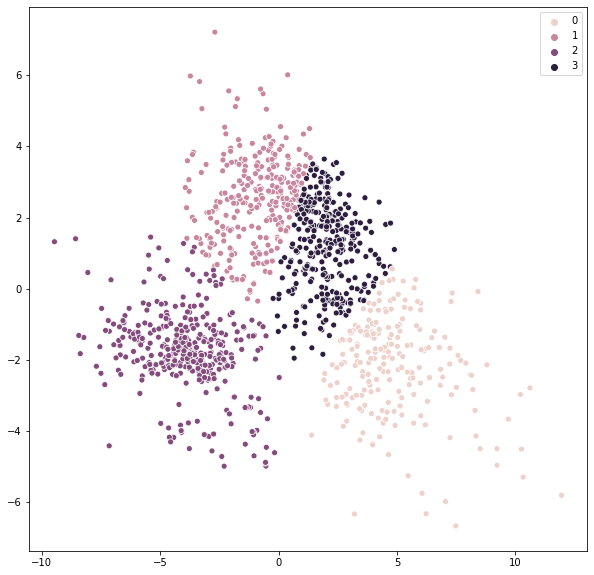

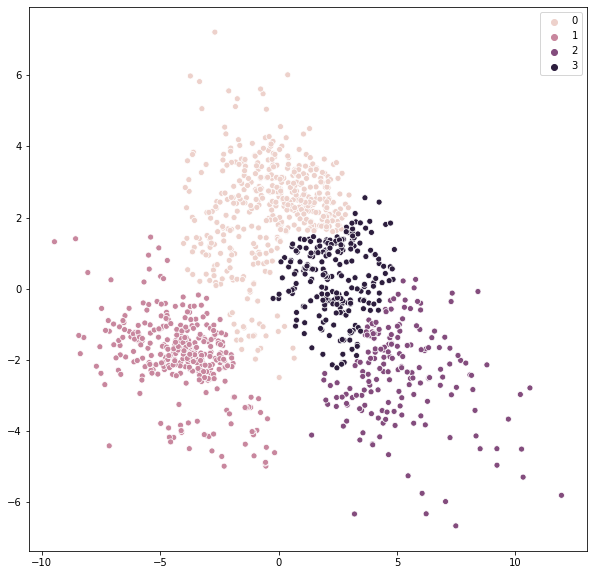

In [8]:
pca = PCA(n_components=2)
# pca = PCA(0.75)

n = 4

principal_components = pca.fit_transform(X)
print(principal_components.shape)
# KMean
kmean_pred = KMeans(n_clusters=n, random_state=0).fit_predict(principal_components)
plotCluster(principal_components[:,0], principal_components[:,1], kmean_pred)

# AgglomerativeClustering
ac_pred = AgglomerativeClustering(n_clusters=n).fit_predict(principal_components)
plotCluster(principal_components[:,0], principal_components[:,1], ac_pred)

In [9]:
processedData.head()

,LotArea,Street,Alley,LotShape,LandContour,LandSlope,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRA,Condition2_RRN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD
0,8450,1,0.0,4,4,1,CollgCr,2.0,7,5,2003,2003,5,7,196.0,4,3,9.0,3.0,1.0,6.0,1.0,856,5,1,5.0,1710,1,0,2,1,3,1,4,8,8,0,0.0,5.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,0.0,0.0,0,2,2008,208500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,9600,1,0.0,4,4,1,Veenker,1.0,6,8,1976,1976,5,7,0.0,3,3,9.0,3.0,4.0,5.0,1.0,1262,5,1,5.0,1262,0,1,2,0,3,1,3,6,8,1,3.0,5.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,0.0,0.0,0,5,2007,181500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,11250,1,0.0,3,4,1,CollgCr,2.0,7,5,2001,2002,5,7,162.0,4,3,9.0,3.0,2.0,6.0,1.0,920,5,1,5.0,1786,1,0,2,1,3,1,4,6,8,1,3.0,5.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,0.0,0.0,0,9,2008,223500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,14260,1,0.0,3,4,1,NoRidge,2.0,8,5,2000,2000,5,7,350.0,4,3,9.0,3.0,3.0,6.0,1.0,1145,5,1,5.0,2198,1,0,2,1,4,1,4,9,8,1,3.0,5.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,0.0,0.0,0,12,2008,250000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,14115,1,0.0,3,4,1,Mitchel,1.5,5,5,1993,1995,5,7,0.0,3,3,9.0,3.0,1.0,6.

In [10]:
processedData['PC1'] = principal_components[:,0]
processedData['PC2'] = principal_components[:,1]
processedData['KMeans'] = kmean_pred
processedData['Agglomerative'] = ac_pred
processedData.head()

,LotArea,Street,Alley,LotShape,LandContour,LandSlope,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRA,Condition2_RRN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD,PC1,PC2,KMeans,Agglomerative
0,8450,1,0.0,4,4,1,CollgCr,2.0,7,5,2003,2003,5,7,196.0,4,3,9.0,3.0,1.0,6.0,1.0,856,5,1,5.0,1710,1,0,2,1,3,1,4,8,8,0,0.0,5.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,0.0,0.0,0,2,2008,208500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-3.786906,-1.970768,2,1
1,9600,1,0.0,4,4,1,Veenker,1.0,6,8,1976,1976,5,7,0.0,3,3,9.0,3.0,4.0,5.0,1.0,1262,5,1,5.0,1262,0,1,2,0,3,1,3,6,8,1,3.0,5.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,0.0,0.0,0,5,2007,181500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.112478,2.327541,1,0
2,11250,1,0.0,3,4,1,CollgCr,2.0,7,5,2001,2002,5,7,162.0,4,3,9.0,3.0,2.0,6.0,1.0,920,5,1,5.0,1786,1,0,2,1,3,1,4,6,8,1,3.0,5.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,0.0,0.0,0,9,2008,223500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-4.342827,-1.458907,2,1
4,14260,1,0.0,3,4,1,NoRidge,2.0,8,5,2000,2000,5,7,350.0,4,3,9.0,3.0,3.0,6.0,1.0,1145,5,1,5.0,2198,1,0,2,1,4,1,4,9,8,1,3.0,5.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,0.0,0.0,0,12,2008,250000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,

In [25]:
embedding = MDS(n_components=2, metric=False, verbose=1, n_init=10)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

breaking at iteration 2 with stress 32704.704748232973
breaking at iteration 2 with stress 32602.766768871505
breaking at iteration 2 with stress 32667.00323711082
breaking at iteration 2 with stress 32436.842055188943
breaking at iteration 2 with stress 32586.69976746018
breaking at iteration 2 with stress 32709.004449931173
breaking at iteration 2 with stress 32521.80085187576
breaking at iteration 2 with stress 32459.38299858764
breaking at iteration 2 with stress 32602.62283652844
breaking at iteration 2 with stress 32867.20565391134


(1193, 2)

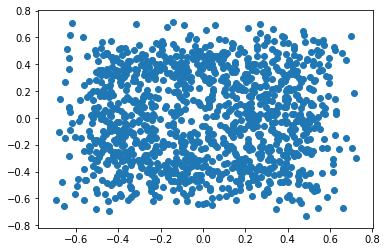

In [26]:
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.show()

In [27]:
processedData['MDS1'] = X_transformed[:,0]
processedData['MDS2'] = X_transformed[:,1]
processedData.head()

,LotArea,Street,Alley,LotShape,LandContour,LandSlope,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRA,Condition2_RRN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD,PC1,PC2,KMeans,Agglomerative,MDS1,MDS2
0,8450,1,0.0,4,4,1,CollgCr,2.0,7,5,2003,2003,5,7,196.0,4,3,9.0,3.0,1.0,6.0,1.0,856,5,1,5.0,1710,1,0,2,1,3,1,4,8,8,0,0.0,5.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,0.0,0.0,0,2,2008,208500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-3.786906,-1.970768,2,1,-0.271782,-0.316910
1,9600,1,0.0,4,4,1,Veenker,1.0,6,8,1976,1976,5,7,0.0,3,3,9.0,3.0,4.0,5.0,1.0,1262,5,1,5.0,1262,0,1,2,0,3,1,3,6,8,1,3.0,5.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,0.0,0.0,0,5,2007,181500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.112478,2.327541,1,0,-0.281564,0.154898
2,11250,1,0.0,3,4,1,CollgCr,2.0,7,5,2001,2002,5,7,162.0,4,3,9.0,3.0,2.0,6.0,1.0,920,5,1,5.0,1786,1,0,2,1,3,1,4,6,8,1,3.0,5.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,0.0,0.0,0,9,2008,223500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-4.342827,-1.458907,2,1,0.030531,0.077850
4,14260,1,0.0,3,4,1,NoRidge,2.0,8,5,2000,2000,5,7,350.0,4,3,9.0,3.0,3.0,6.0,1.0,1145,5,1,5.0,2198,1,0,2,1,4,1,4,9,8,1,3.0,5.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,0.0,0.0,0,12,2008,250000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [28]:
processedData.to_csv('processedData.csv', index=False)

In [15]:
dd = processedData['Neighborhood'].value_counts().to_dict()
k, v, p = [], [], []
for key in dd.keys():
    k.append(key)
    v.append(dd[key])
    p.append(processedData[processedData['Neighborhood'] == key].SalePrice.max())
ddd = pd.DataFrame({'key': k, 'frequency': v, 'price': p})
ddd = ddd.sort_values(by='price', ascending=False)
ddd.to_csv('DB_Neighborhood.csv', index=False)

In [17]:
dd = processedData['OverallQual'].value_counts().to_dict()
k, v, p = [], [], []
for key in dd.keys():
    k.append(key)
    v.append(dd[key])
    p.append(processedData[processedData['OverallQual'] == key].SalePrice.max())
ddd = pd.DataFrame({'key': k, 'frequency': v, 'price': p})
ddd = ddd.sort_values(by='key', ascending=True)
ddd.to_csv('DB_OverallQual.csv', index=False)